## Machine Machine Learning with Multiple Linear Regression

In this project we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

### Importing the Libraries

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
pd.set_option('display.max_colwidth', -1)

### Dataset

In [73]:
#Load the dataset
dataset = pd.read_csv("../machine/petrol_consumption.csv")
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Exploratory Data Analysis

To see statistical details of the dataset, we'll use the describe() command again

In [74]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


### Preparing the Data

The next step is to divide the data into attributes and labels

In [75]:
# use column names for creating an attribute set and label
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

Divide data into training and test sets

In [76]:
# Split the dataset in a 80–20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
# multiple linear regression 
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Mon, 18 May 2020   Prob (F-statistic):           3.91e-10
Time:                        15:41:27   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          377.2911    185.541      2.033      0.048       3.112     751.471
Petrol_tax                     -34.7901     12.970     -2.682      0.010     -60.947      -8.633
Average_income                  -0.0666      0.017     -3.867      0.000      -0.101      -0.032
Paved_Highways                  -0.0024      0.003     -0.716      0.478      -0.009       0.004
Population_Driver_licence(%)  1336.4494    192.298      6.950      0.000     948.643    1724.256
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.510
Skew:                           1.056   Prob(JB):                     5.80e-05
Kurtosis:                       5.300   Cond. No.                     1.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Print the split dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 4)
(10, 4)
(38,)
(10,)


### Training the Algorithm

In [54]:
# Train the algorithm using fit()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Finds the best value for the intercept and slope

In [55]:
# Retrieve the intercept value
print(regressor.intercept_)

425.5993322032417


In [56]:
# Retrieving the slope (coefficient of x)
print(regressor.coef_)

[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


###  Coefficients of regression model

In [57]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petrol_tax", there is a decrease of 24.19 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data

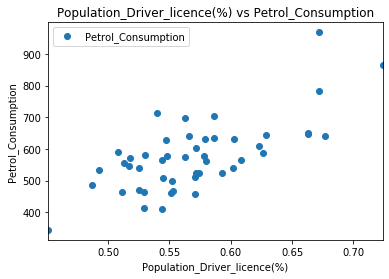

In [58]:
data.plot( x = "Population_Driver_licence(%)", y = "Petrol_Consumption",style='o')
plt.title("Population_Driver_licence(%) vs Petrol_Consumption")
plt.xlabel("Population_Driver_licence(%)")
plt.ylabel("Petrol_Consumption")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the Population Driver licence(%) and petrol Consumption.

### Making Predictions

In [59]:
# predictions
y_pred = regressor.predict(X_test)

Compare the actual output values for X_test with the predicted values

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


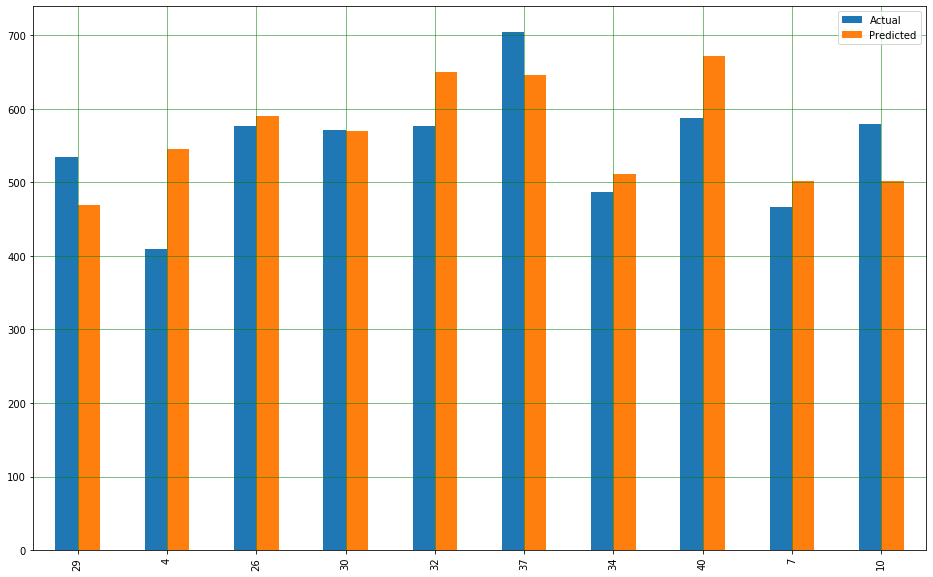

In [63]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE.

In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.